In [1]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [3]:
count = 0 
dirs = os.listdir('Images/')
for dir in dirs:
    files = list(os.listdir('Images/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')

Astilbe Folder has 737 Images
Bellflower Folder has 873 Images
Dandelion Folder has 1052 Images
Magnolia Folder has 1048 Images
Orchid Folder has 1000 Images
Sunflower Folder has 1000 Images
Images Folder has 5710 Images


In [4]:
base_dir = 'Images/'
img_size = 180
batch = 32

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 5710 files belonging to 6 classes.
Using 4568 files for training.
Found 5710 files belonging to 6 classes.
Using 1142 files for validation.


In [6]:
flower_names = train_ds.class_names
flower_names

['Astilbe', 'Bellflower', 'Dandelion', 'Magnolia', 'Orchid', 'Sunflower']

In [7]:
import matplotlib.pyplot as plt

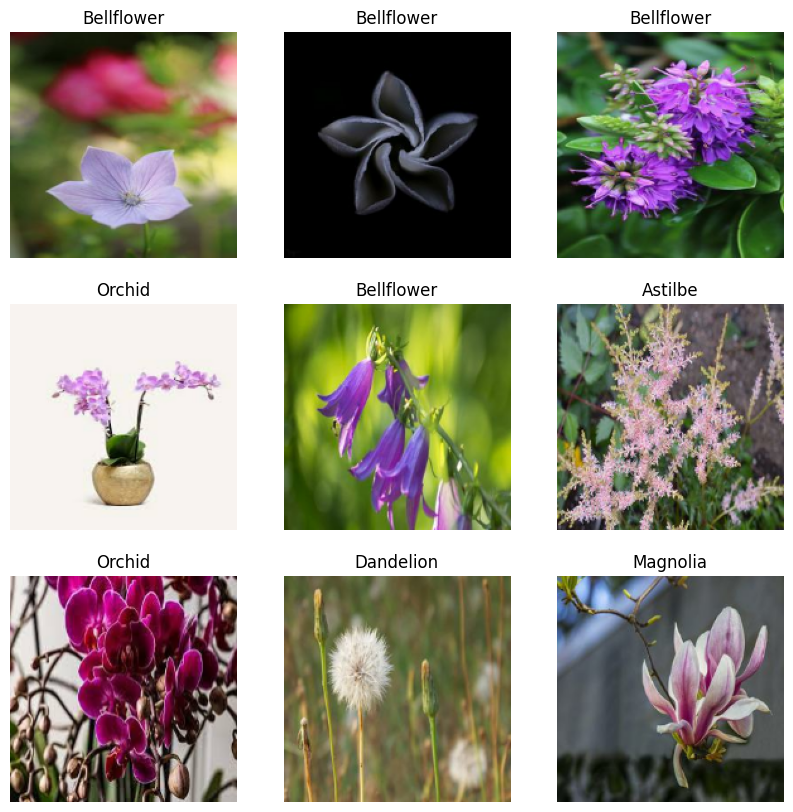

In [10]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [11]:
AUTOTUNE = tf.data.AUTOTUNE

In [12]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [13]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [15]:
img_size = 180
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

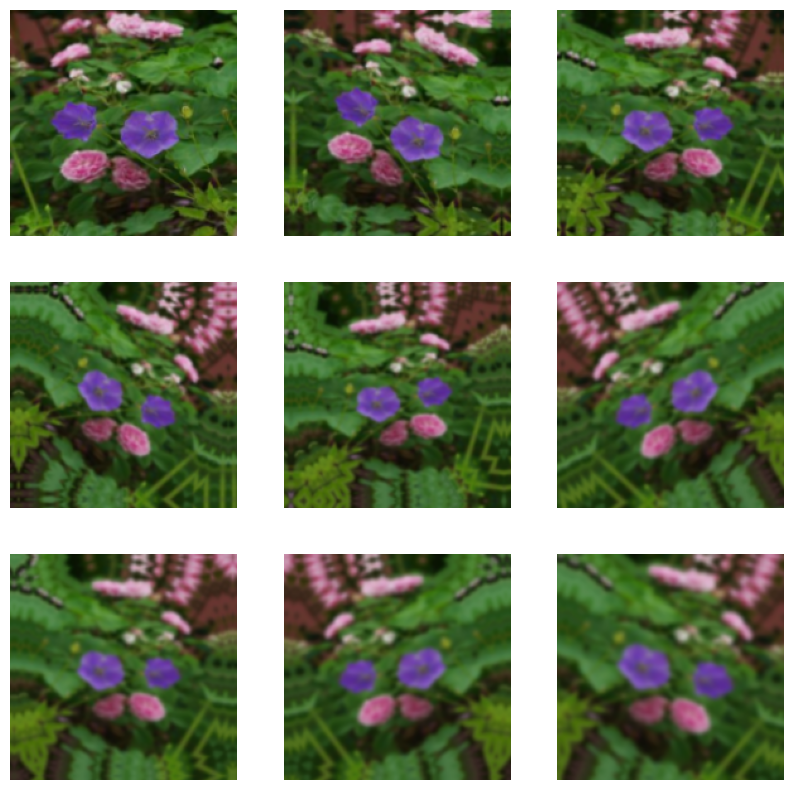

In [17]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [18]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(6)
])

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,414 (15.22 MB)

 Trainable params: 3,989,414 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 26s 171ms/step - accuracy: 0.4010 - loss: 1.4800 - val_accuracy: 0.6637 - val_loss: 0.9323
Epoch 2/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 25s 177ms/step - accuracy: 0.6885 - loss: 0.8610 - val_accuracy: 0.6690 - val_loss: 0.9349
Epoch 3/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 26s 179ms/step - accuracy: 0.7312 - loss: 0.7490 - val_accuracy: 0.7312 - val_loss: 0.7562
Epoch 4/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 27s 188ms/step - accuracy: 0.7637 - loss: 0.6466 - val_accuracy: 0.7496 - val_loss: 0.7043
Epoch 5/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 25s 173ms/step - accuracy: 0.7639 - loss: 0.6222 - val_accuracy: 0.7662 - val_loss: 0.6717
Epoch 6/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 26s 183ms/step - accuracy: 0.7957 - loss: 0.5621 - val_accuracy: 0.7986 - val_loss: 0.6344
Epoch 7/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 27s 187ms/step - accuracy: 0.8100 - loss: 0.5246 - val_accuracy: 0.8284 - val_loss: 0.5233
Epoch 8/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 26s 185ms/step - accuracy: 0.8225 - loss: 0

In [22]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [31]:
classify_images('Sample/sunflower2.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


'The Image belongs to Sunflower with a score of 99.9454915523529'

In [32]:
model.save('Flower_Recognition_Model.h5')